(1200, 1200)


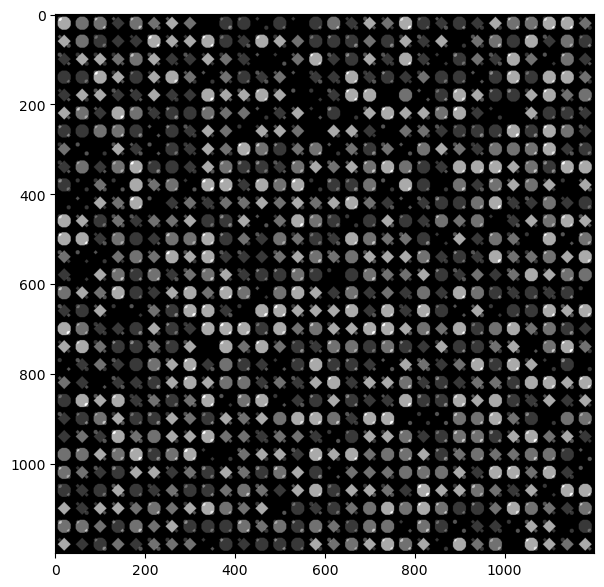

In [2]:
from skimage.util import random_noise
from skimage.restoration import denoise_nl_means, estimate_sigma

import numpy as np

from matplotlib import pyplot as plt
import tifffile

import os

# Open the image file
img = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img/paper_img.tiff")
print(img.shape)
img = (img - np.min(img))/(np.max(img) - np.min(img))

# Display the image
plt.figure(figsize=(7,7))
plt.imshow(img, cmap = 'gray')

In [3]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(1.0 / np.sqrt(mse))

9.869927164186437


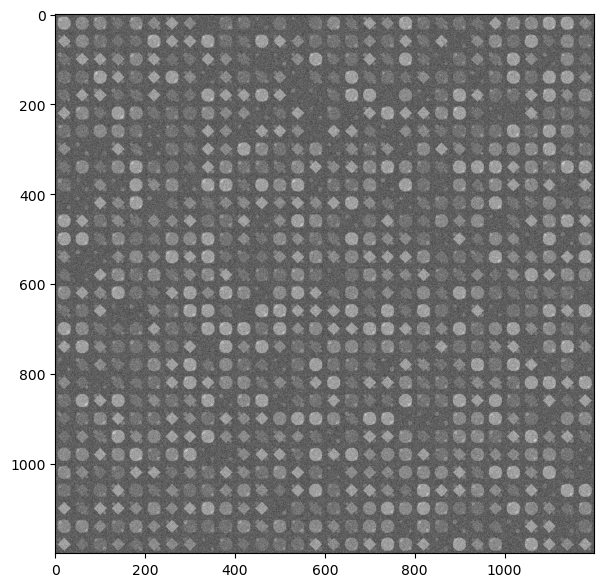

In [4]:
if(os.path.exists("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-noisy.tiff")):
    noisy = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-noisy.tiff")
else:
    mean = 0
    sigma = 0.2
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 

    noisy = img + gaussian

    noisy = (noisy - np.min(noisy))/(np.max(noisy) - np.min(noisy))

    tifffile.imsave("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-noisy.tiff", noisy)

    
plt.figure(figsize=(7,7))
plt.imshow(noisy, cmap='gray')

psnr_noisy = psnr(img, noisy)
print(psnr_noisy)

0.07833256958049048
11.47110359848121


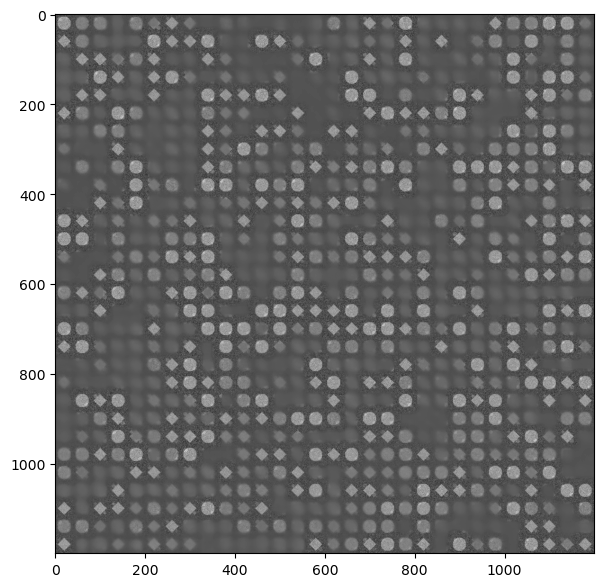

In [4]:
# NLM 

noisy = noisy[...,np.newaxis]
sigma_est = np.mean(estimate_sigma(noisy, channel_axis=-1))
print(sigma_est)

patch_kw = dict(patch_size=40,      # 5x5 patches
                patch_distance=100,  # 13x13 search area
                channel_axis=-1)

# slow algorithm
denoised_nlm = denoise_nl_means(noisy, h=0.7 * sigma_est, fast_mode=True,
                           **patch_kw)
                           

denoised_nlm = (denoised_nlm - np.min(denoised_nlm))/(np.max(denoised_nlm) - np.min(denoised_nlm))

psnr_nlm = psnr(img, denoised_nlm)
print(psnr_nlm)

plt.figure(figsize=(7,7))
plt.imshow(denoised_nlm, cmap='gray')

tifffile.imsave("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-nlm.tiff", denoised_nlm)

# 11.2 --> 0.8
# 9.87 --> 0.2
# 10.33 --> 0.65 
# 14.23 --> 0.9
# 11.47 -- >0.7

In [5]:
from skimage.metrics import structural_similarity as ssim

ssim_nlm = ssim(img, denoised_nlm, data_range=1)
print(ssim_nlm)

0.19169415046880775


Time for loading: 0.013071537017822266 seconds!
[[26, 1081], [112, 1075], [230, 217], [308, 1122], [409, 909], [558, 378], [599, 249], [729, 217], [869, 375], [921, 326], [1019, 1117], [1125, 737]]
Time for generating basic templates: 0.0009670257568359375 seconds!
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Completed iteration
1.13.1
Used 8388subimages
Time for generating extra templates and classifying 15 times: 73.17079567909241 seconds!
Used 8388subimages
Time for sort : 0.34560275077819824 seconds!
Time for clustering : 1.0688560009002686 seconds!
Used 8388subimages
Time for backplotting-2 : 1.249783992767334 seconds!
Total time: 75.9029462337493

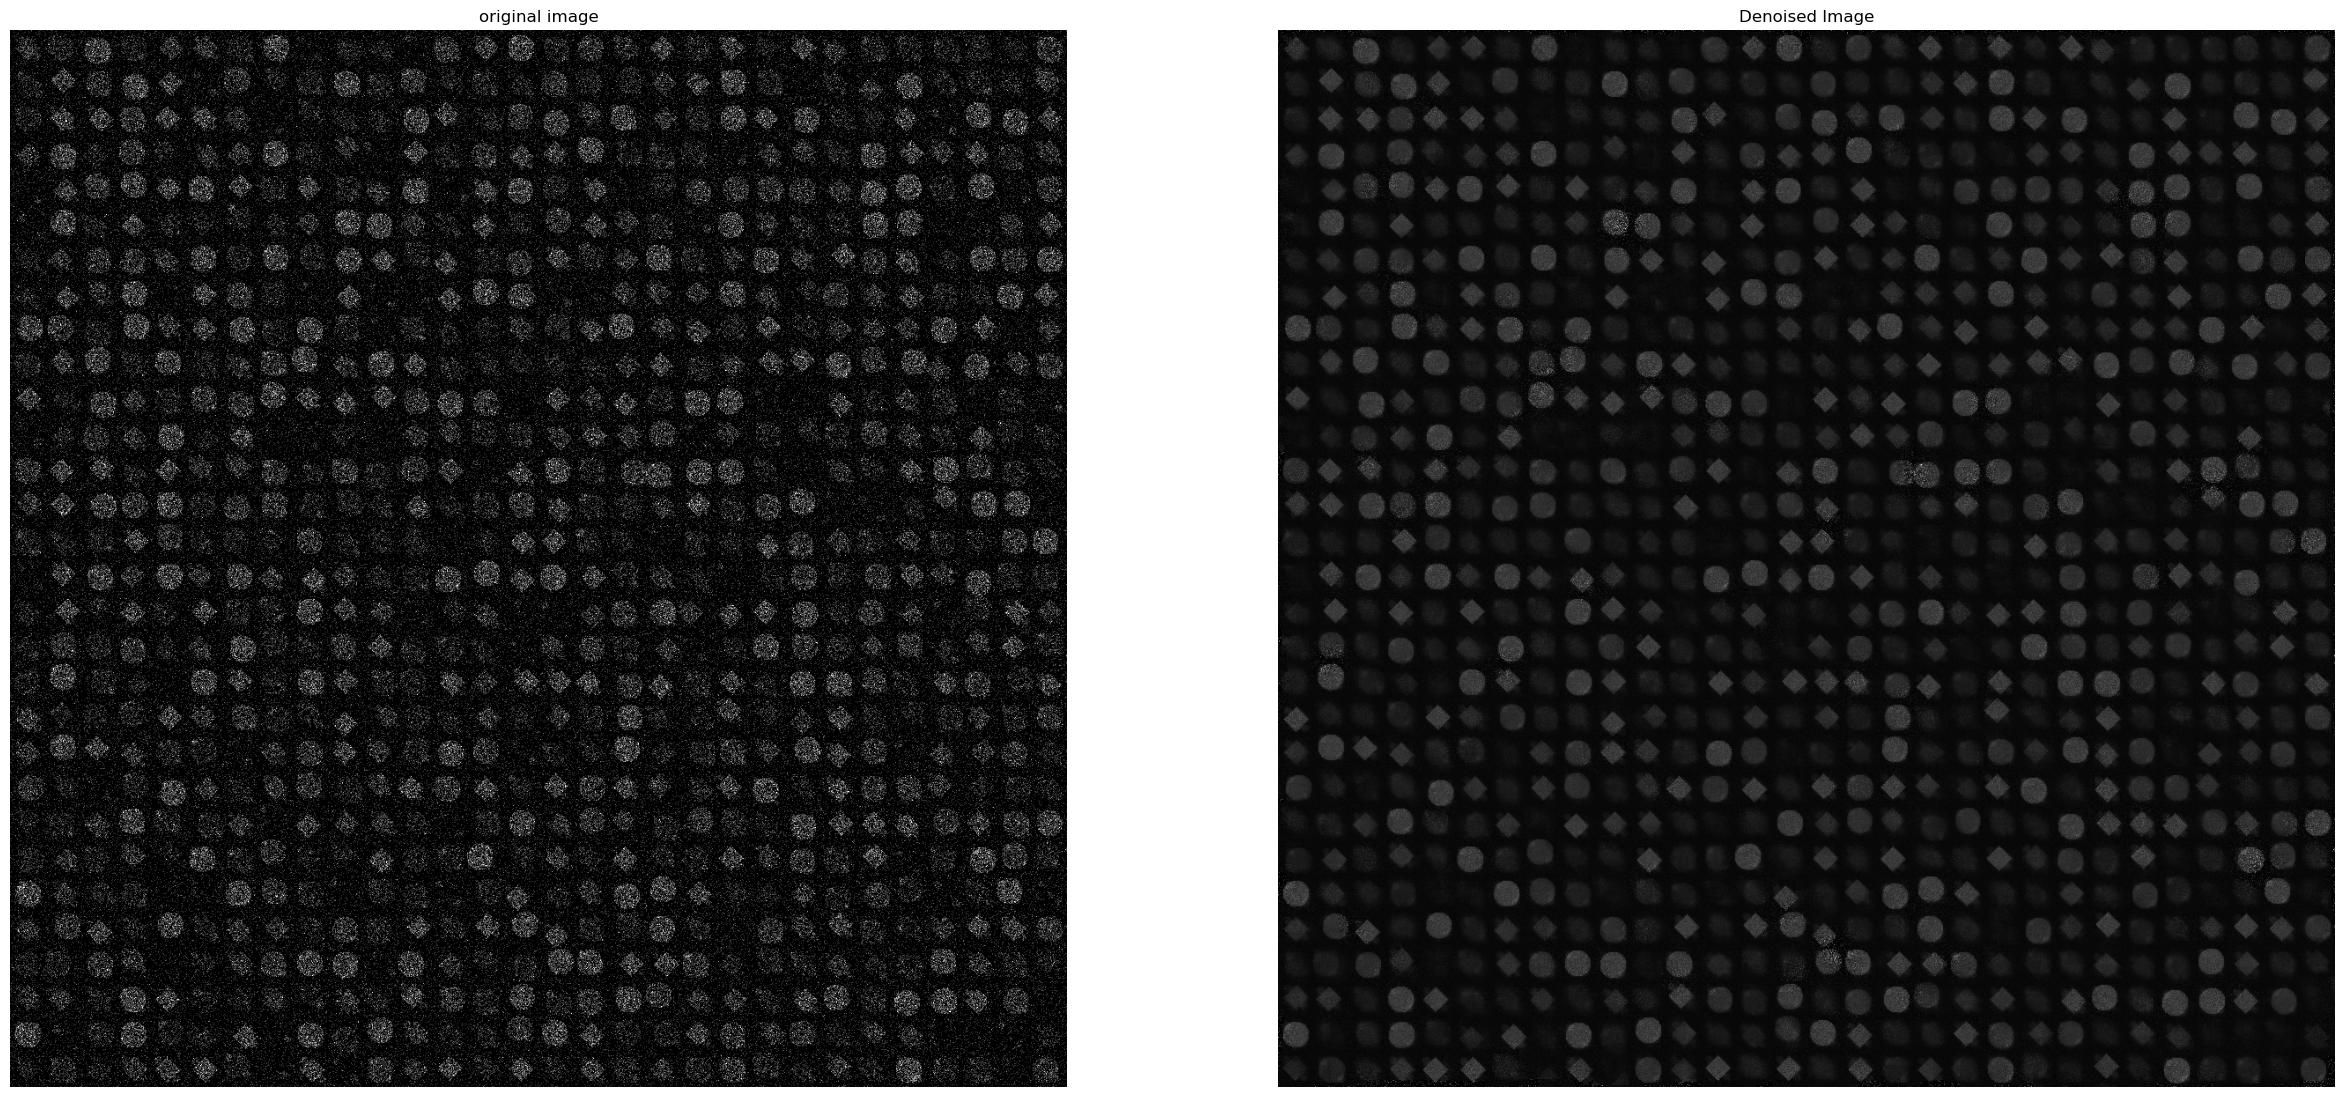

In [4]:
import os
from denoisemain import denoiser

os.chdir("../")

denoiser()

os.chdir("./denoiser/")

denoiser_denoiser = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-denoised.tiff")

denoiser_denoiser = (denoiser_denoiser - np.min(denoiser_denoiser))/(np.max(denoiser_denoiser) - np.min(denoiser_denoiser))

psnr_denoiser = psnr(img[20:-20,20:-20], denoiser_denoiser)
print(psnr_denoiser)
# 18.324 & 0.3834
# data_dict = {
#         "img_folder": 'C:/Users/Anil Kumar/Downloads/paper_img/',
#         "results_dir" : "C:/Users/Anil Kumar/Downloads/paper_img/",
#         "img_name" : "paper_img.tiff",
#         "reruns" : 15,
#         "template_size" : 40,
#         "clustering_factor": 4,
#         "termination_number": 3,
#         "analyze": False,
#         "min_num_class": 5,
#         "max_num_class":200
#     }

#12.5495


In [5]:
denoiser_denoiser = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-denoised- best.tiff")

denoiser_denoiser = (denoiser_denoiser - np.min(denoiser_denoiser))/(np.max(denoiser_denoiser) - np.min(denoiser_denoiser))

psnr_denoiser = psnr(img[20:-20,20:-20], denoiser_denoiser)
print(psnr_denoiser)

18.324360912933734


In [5]:
psnr_denoiser = psnr(img, denoiser_denoiser)
print(psnr_denoiser)


18.324360912933734


In [11]:
import bm3d

denoised_bm3d = bm3d.bm3d(noisy , sigma_psd = 0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)

denoised_bm3d = (denoised_bm3d - np.min(denoised_bm3d))/(np.max(denoised_bm3d) - np.min(denoised_bm3d))

psnr_bm3d = psnr(img, denoised_bm3d)
print(psnr_bm3d)

plt.figure(figsize=(7,7))
plt.imshow(denoised_bm3d, cmap='gray')

tifffile.imsave("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-bm3d.tiff", denoised_bm3d)

In [7]:
from skimage.metrics import structural_similarity as ssim

ssim_bm3d = ssim(img, denoised_bm3d, data_range=1)
print(ssim_bm3d)

0.32404016060727664


In [6]:
from skimage.metrics import structural_similarity as ssim

ssim_denoiser= ssim(img[20:-20,20:-20], denoiser_denoiser, data_range=1)
print(ssim_denoiser)

0.3834361863951605


20.375919089890683


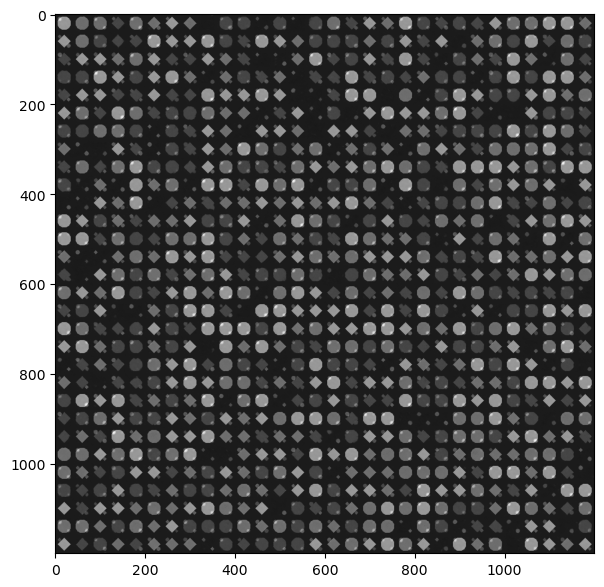

In [7]:
denoised_n2v = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img/output_n2v-initial.tif")

denoised_n2v = (denoised_n2v - np.min(denoised_n2v))/(np.max(denoised_n2v) - np.min(denoised_n2v))

psnr_n2v = psnr(img, denoised_n2v)
print(psnr_n2v)

plt.figure(figsize=(7,7))
plt.imshow(denoised_n2v, cmap='gray')



In [2]:
film_stack_raw = tifffile.imread("C:/dXs_datalab/ct reconstruction/tomo_20211211-03-a-img_stack/tomo_20211211-03-a-img_stack.tiff")

In [3]:
frame_1 = film_stack_raw[119,:,:]
frame_2 = film_stack_raw[121,:,:]

frame_1_3c = np.zeros((frame_1.shape[0], frame_1.shape[1],3))
frame_2_3c = np.zeros((frame_2.shape[0], frame_2.shape[1],3))

print(frame_1_3c.shape)

for i in range(3):
    frame_1_3c[:,:,i] = frame_1
    frame_2_3c[:,:,i] = frame_2


(1280, 1312, 3)


In [140]:
frame_1_3c = (frame_1_3c - np.min(frame_1_3c))/(np.max(frame_1_3c) - np.min(frame_1_3c))

In [143]:
from PIL import Image

im = Image.fromarray(frame_1_3c,'RGB')
im.save("C:/Users/Anil Kumar/Downloads/frame_1.jpeg")
im = Image.fromarray(frame_2_3c,'RGB')
im.save("C:/Users/Anil Kumar/Downloads/frame_2.jpeg")

In [119]:
tifffile.imsave("C:/Users/Anil Kumar/Downloads/frame-1.tiff", frame_1)
tifffile.imsave("C:/Users/Anil Kumar/Downloads/frame-2.tiff", frame_2)



In [14]:

denoised_n2v = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img-n2v.tif")
denoised_denoiser = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img/paper_img-denoised.tiff")

10.08054071139495


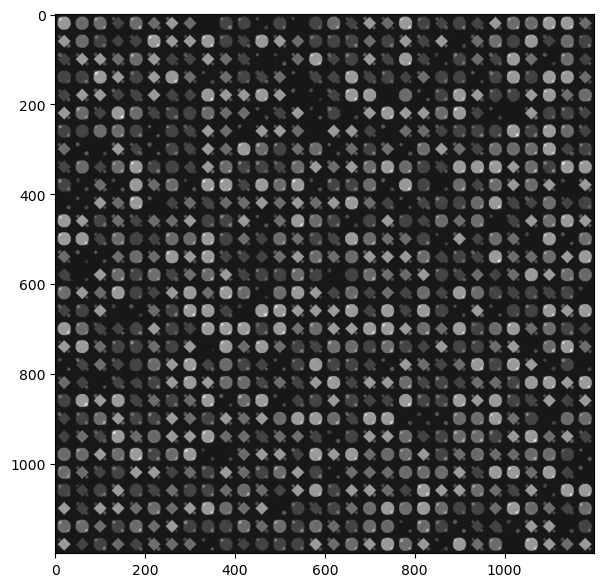

In [15]:
psnr_n2v = psnr(img, denoised_n2v)
print(psnr_n2v)

plt.figure(figsize=(7,7))
plt.imshow(denoised_n2v, cmap='gray')

10.050698430860239


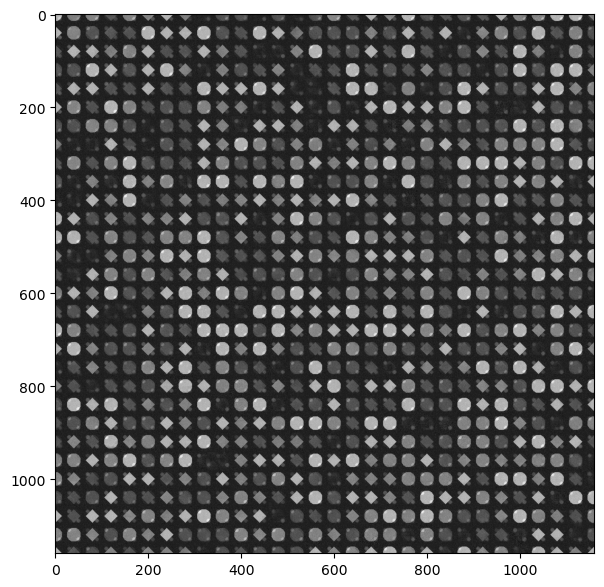

In [16]:
psnr_denoiser = psnr(img[20:-20,20:-20], denoised_denoiser)
print(psnr_denoiser)

plt.figure(figsize=(7,7))
plt.imshow(denoised_denoiser, cmap='gray')

In [114]:
bm3d_results = (bm3d_results - np.min(bm3d_results))/(np.max(bm3d_results)-np.min(bm3d_results))

In [116]:
psnr_bm3d = psnr(_img, bm3d_results)
psnr_bm3d

11.596076571859047

In [120]:
import pylab
import imageio


In [144]:
filename = "C:/Users/Anil Kumar/Downloads/download (1).mp4"
vid = imageio.get_reader(filename,  'ffmpeg')


In [145]:
vid.count_frames()

5

In [161]:
from copy import deepcopy

frames = np.zeros((5,vid.get_data(0).shape[0],vid.get_data(0).shape[1]))
for num in range(5):
    image = vid.get_data(num)
    frames[num,:,:] = deepcopy(np.array(image[:,:,0]))


In [162]:
tifffile.imsave("C:/Users/Anil Kumar/Downloads/film.tiff", frames)

In [1]:
import tifffile

img = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img.tiff")
noisy = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img-noisy.tiff")
denoised = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img-denoised.tiff")

In [2]:
import numpy as np

img = (img - np.min(img))/(np.max(img)-np.min(img))


In [3]:
denoised = (denoised - np.min(denoised))/(np.max(denoised)-np.min(denoised))


In [4]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(1.0 / np.sqrt(mse))

In [5]:
psnr_noisy = psnr(img, noisy)
psnr_noisy

8.610215419572087

In [6]:
psnr_denoiser = psnr(img[18:-18,18:-18], denoised)
psnr_denoiser

9.653241810120228

In [7]:
nlm = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img-nlm.tiff")
# bm3d_ = tifffile.imread("C:/Users/Anil Kumar/Downloads/paper_img-nlm.tiff")

In [8]:
psnr_nlm = psnr(img, nlm)
psnr_nlm

9.380153111760077

In [9]:
import bm3d

bm3d_results = bm3d.bm3d(noisy , sigma_psd = 0.5, stage_arg=bm3d.BM3DStages.ALL_STAGES)

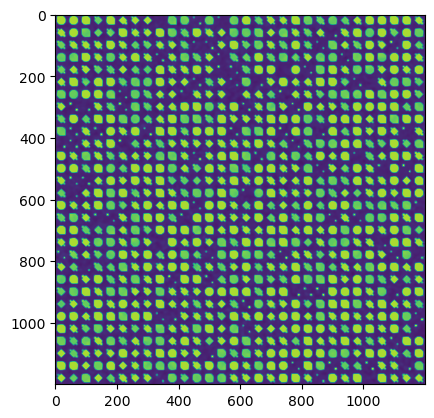

In [11]:
from matplotlib import pyplot as plt

plt.imshow(bm3d_results)

In [12]:
tifffile.imsave("C:/Users/Anil Kumar/Downloads/paper_img-bm3d.tiff", bm3d_results)

In [14]:
bm3d_results = (bm3d_results - np.min(bm3d_results))/(np.max(bm3d_results)-np.min(bm3d_results))

In [16]:
psnr_bm3d = psnr(img, bm3d_results)
psnr_bm3d

11.596076571859047

In [7]:
import tifffile
import numpy as np

raw_stack = tifffile.imread("C:/Users/Anil Kumar/Downloads/alternate predict/tomo_20211211-03-a-img_stack.tiff")


In [8]:
raw_stack.shape

(241, 1280, 1312)

In [10]:
from copy import deepcopy

new_arr = np.zeros(((raw_stack.shape[0]//2) + 1, raw_stack.shape[1], raw_stack.shape[2]))

for i in range(raw_stack.shape[0]):
    if i%2==0:
        new_arr[i//2,:,:] = raw_stack[i,:,:]


In [11]:
new_arr.shape

(121, 1280, 1312)

In [12]:
tifffile.imsave("C:/Users/Anil Kumar/Downloads/alternate predict/tomo_20211211-03-a-img_stack-half.tiff", new_arr)